# MA 755 - Assignment 3

by Neha, Katrina, Chengdong

## **1. Introduction**

## **2. Get the data**
    1. Set up the working directory
    2. Download and unzip the data file
    3. Take a quick look at the data structure
    4. Create a train set and a test set
  
## **3. Data discovery and visualization**
    1. Box plot and histogram
    2. Examine the correlation

## **4. Data preparation for Machine Learning algorithms**
    1. Train set data cleaning - imputing missing values
    2. Test set data cleaning - drop rows with missing values

## **5. PCA**
    1. PCA with 2 levels of n_components
    2. Incremental PCA with 2 levels of n_components
    3. Randomized PCA with 2 levels of n_components

## **6. Logistic regression model with PCA**
    1. Logistic regression with PCA 
    2. Logistic regression with incremental PCA
    3. Logistic regression with randomized PCA
    
## **7. Logistic regression model with Kernel PCA**
    1. GridSearch with KernelPCA
    2. Logistic regression model with KernelPCA 

## **8. Comparison of model performance**   

## **9. Conclusion**

## 1. Introduction

The data we are working on is provided by the U.S department of Education. The data set contains information on College Scorecard, federal financial aid and students' earninngs. The data set can help the students make informed educational choices by providing information on federal financial aid, school performance as well as students' long term career outcomes. The data set contains 1743 variables which are organized into 10 categories. The categories cover a broad range of topics such as school, academics, admissions, student, cost, repayment, completion and earnings.

The goal for this assignment is to reduce the dimensionality of the data using a feature extraction approach called Principal Component Analysis. In order to prevent the curse of dimensionality, PCA looks for a few linear combinations (of X variables, or features) which can be used to summarize the data, losing in the process as little information as possible. 

The objectives for this assignment are stated below :
*  Run PCA, Incremental PCA and Randomized PCA for two levels of number of components 
*  Use the PCA scores obtained to compare prediction accuracy of the model with and without dimensionality reduction
*  Run Kernel PCA on the data to find the best kernel by tuning the hyperparameters using Grid Search 


## 2. Get the data

### *2.1. Set up the working directory *

The first step is to create a workspace. We import the `os` module. Next we us the `getcwd` method to return a string representing the current working directory. Then we use the `chdir` method to change the current working directory to path mentioned. Finally we confirm if our working directory is set to the one specified by calling `getcwd` method again.

In [197]:
import os
os.getcwd() 

'C:\\Users\\Chengdong Liang\\Desktop\\MA 755\\Assignment 3'

The above output tell us that our current working directory is 'C:\\Users\\Chengdong Liang\\Desktop\\MA-755-Assignment-2-master (1)\\MA-755-Assignment-2-master'

###  *2.2. Download and unzip the data file*

We import the `os` and `zipfile` modules to fetch our data which is in the form of a zipped file. Next we import the `urllib` module that is used to fetch URLs. `COLLEGE_URL` represents the URL for our data. `COLLEGE_PATH` is the directory created in our working space to download and save the dataset.

`fetch_college_data` function has two parameters: `college_url` for the url of our dataset and `college_path` for the path in our working space where the data should be downloaded and saved.`makedirs` method is used to create the `datatsets/college` directory and setting `exist_ok` to True tells Python to not raise an error if the directory already exists.`os.path.join` method combines the name of the directory where the data is stored and the name of the data file to create an absolute path to the datafile.

In [198]:
import zipfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://ed-public-download.apps.cloud.gov/downloads/"
COLLEGE_PATH = "datasets/college"
COLLEGE_URL = DOWNLOAD_ROOT + "CollegeScorecard_Raw_Data.zip"

def fetch_college_data(college_url=COLLEGE_URL, college_path=COLLEGE_PATH):
    os.makedirs(college_path, exist_ok=True)
    zip_path = os.path.join(college_path, "Raw_Data.zip")
    urllib.request.urlretrieve(college_url, zip_path)
    college_zip = zipfile.ZipFile(zip_path)
    college_zip.extractall(path=college_path)
    college_zip.close()

Now we call the function `fetch_college_data`.

In [199]:
fetch_college_data()

It creates a `datasets/college` directory in the workspace, downloads the `CollegeScorecard_Raw_Data.zip` file and extracts all files from it in this directory.

The code below is the function to read in the csv file `MERGED2014_15_PP.csv` to a Pandas DataFrame.

In [200]:
import pandas as pd

DATA_PATH= "datasets/college/CollegeScorecard_Raw_Data"

def load_college_data(data_path=DATA_PATH):
    # `data_path` is relative to the directory containing this script
    csv_path = os.path.join(data_path, "MERGED2014_15_PP.csv")
    return pd.read_csv(csv_path, low_memory=False)

### *2.3 Take a quick look at the data structure*

Next we call the function `load_college_data` which returns a Pandas DataFrame and assign it to `college_original`. We also confirm its type and then look at the first five rows of the DataFrame `college_original` using the `head()` method

In [201]:
college_original = load_college_data()
print(type(college_original))
college_original.head()

<class 'pandas.core.frame.DataFrame'>


,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D100_L4,TRANS_4,DTRANS_4,TRANS_L4,DTRANS_L4,ICLEVEL,UGDS_MEN,UGDS_WOMEN,CDR3_DENOM,CDR2_DENOM
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,NaN,0.0000,1044.0,NaN,NaN,1,0.4831,0.5169,1895.0,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,NaN,0.2408,1246.0,NaN,NaN,1,0.4169,0.5831,3937.0,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,0.0000,9.0,NaN,NaN,1,0.3986,0.6014,344.0,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,NaN,0.3477,765.0,NaN,NaN,1,0.5733,0.4267,1513.0,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,NaN,0.0000,1330.0,NaN,NaN,1,0.3877,0.6123,2137.0,NaN


The output tells us that `college_original` is a pandas Dataframe. Each row represents one college. There are 1743 attributes (columns). 

For further analysis, we need to subset this data set to include only our variables of interest.

### *2.4 Subsetting the data*

Based on the original dataset, a new dataframe is created, which includes the variables we mainly focus on:
* Dependent variables - 1
* Independent variables - 10

| **Variables** | **Description**      | **Type** | **Dependent/Independent**  |
| ------------- |:-------------:| -----------:|-----------:|
|CONTROL| Public or private institution |Categorical| Dependent|
|PCTFLOAN      | Rate of receiving federal loans | Numeric|Independent |
|PCTPELL      | Rate of receiving pell grant | Numeric|Independent |
| FEMALE      | Percentage of female students      | Numeric|  Independent |
| MARRIED | Percentage of married students|Numeric|   Independent |
| DEPENDENT |Percentage of married students     |Numeric|    Independent |
| VETERAN | Percentage of veteran students     |Numeric|   Independent |
|TUITFTE| Net tuition revenue per full-time student |Numeric| Independent|
|INEXPFTE|Instructional expenditures per full-time student |Numeric| Independent|
|DEP_INC_AVG|Average family income of dependent students |Numeric| Independent|
|IND_INC_AVG|Average family income of independent students |Numeric| Independent|

Subsetting the DataFrame is done using square brackets and the names of the columns to be selected are placed inside the brackets. The selected columns are put in a new DataFrame called `college`.

Let's have a quick look at the first 5 rows of the DataFrame `college` by using the `head()` method.

In [202]:
college=college_original[['CONTROL','PCTFLOAN','PCTPELL','FEMALE','MARRIED', 'DEPENDENT', 'VETERAN',
                          'TUITFTE', 'INEXPFTE', 'DEP_INC_AVG', 'IND_INC_AVG' ]]
college.head()

,CONTROL,PCTFLOAN,PCTPELL,FEMALE,MARRIED,DEPENDENT,VETERAN,TUITFTE,INEXPFTE,DEP_INC_AVG,IND_INC_AVG
0,1,0.8284,0.7356,0.5262741999,0.0165942315,0.8704069538,PrivacySuppressed,9427.0,7437.0,33370.062501,9184.1313978
1,1,0.5214,0.3460,0.6323896753,0.1034554538,0.6883846794,0.0033305579,9899.0,17920.0,59212.341812,28786.1557
2,2,0.7795,0.6801,0.6465256798,0.2386706949,0.1057401813,PrivacySuppressed,12459.0,5532.0,30720.839981,18578.064211
3,1,0.4596,0.3072,0.4766449021,0.1320944249,0.6514314415,0.0090406831,8956.0,10211.0,67430.323934,25117.976718
4,1,0.7554,0.7347,0.6152291105,0.0097708895,0.8564690027,PrivacySuppressed,7733.0,7618.0,33576.943026,6974.2969861


From the first 5 rows of the data, we can observe that variable `CONTROL` has repetitive values, which indicates it might be a categorical variable. 

Use the `value_counts()` method to have a closer look at `CONTROL`, which gives us the frequency count for each of the unique values of the variable, arranged from highest to lowest.

In [203]:
college.iloc[:,0:1].apply(pd.Series.value_counts)

,CONTROL
3,3703
1,2044
2,1956


The types and levels of the institutions represented by these values are listed below

|| **CONTROL** |    
| ------------- |:-------------:| -----------:|-----------:|
|*1*| Public institutions |
|*2*| Private nonprofit institutions |
|*3*| Private for-profit institutions|

So we can see that there are 3703 Private for-profit institutions, 2044 Public institutions and  1956 Private for-profit institutions.

The code below uses the `info()` method to provide a concise summary of the DataFrame `college`

In [204]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 11 columns):
CONTROL        7703 non-null int64
PCTFLOAN       6966 non-null float64
PCTPELL        6966 non-null float64
FEMALE         7497 non-null object
MARRIED        7497 non-null object
DEPENDENT      7497 non-null object
VETERAN        7497 non-null object
TUITFTE        7270 non-null float64
INEXPFTE       7270 non-null float64
DEP_INC_AVG    7497 non-null object
IND_INC_AVG    7497 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 662.1+ KB


The output tells us that the DataFrame `college` has 7703 observations. The names of the variables, the number of non-null values and the type are displayed as well. For instance, the variable `PCTFLOAN` has 6966 non-null values and is of type `float`.

From the general information, as shown above, it can be seen that the variables `FEMALE`, `MARRIED`, `DEPENDENT`, `VETERAN`, `DEP_INC_AVG`, `IND_INC_AVG` are not numeric. `CONTROL` should be categorical. Therefore, we need to change the type of these variables. 

`to_numeric()` method takes a Pandas series as input and converts it to numeric, coercing when told to by setting `errors` to `coerce`. `as.type(category)` allows us to convert a column to a categorical variable.

In [205]:
for col in college[['FEMALE', 'MARRIED', 'DEPENDENT', 'VETERAN', 'DEP_INC_AVG', 'IND_INC_AVG']]:
    college[col]= pd.to_numeric(college[col], errors='coerce')

college['CONTROL']= college['CONTROL'].astype('category')

C:\Users\Chengdong Liang\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Chengdong Liang\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Next we use the `info()` method to check whether the data type of these variables has been changed.

In [206]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 11 columns):
CONTROL        7703 non-null category
PCTFLOAN       6966 non-null float64
PCTPELL        6966 non-null float64
FEMALE         6354 non-null float64
MARRIED        6540 non-null float64
DEPENDENT      6947 non-null float64
VETERAN        3295 non-null float64
TUITFTE        7270 non-null float64
INEXPFTE       7270 non-null float64
DEP_INC_AVG    6963 non-null float64
IND_INC_AVG    6963 non-null float64
dtypes: category(1), float64(10)
memory usage: 609.4 KB


From the output, we can observe that all variables have been assigned the proper data type.

### *2.4 Create a train set and a test set*

Split the dataset into a train set train_set and a test set test_set. 80% of the data will be used as the training set (named `train_set`), and 20% used as the test set (named `test_set`).

In [207]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(college, test_size=0.2, random_state=42)

This gives us our training set `train_set` and our test set `test_set`.

## 3. Data discovery and visualization

Create a copy of the training set to start exploring.

In [208]:
college = train_set.copy()

### *3.1 Box plot and histogram*

We first load the required libraries for visualization.

In [209]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

The boxplot, as shown below, displays the distribution of variable `PCTFLOAN` and variable `PCTPELL` in each type of institution (that is, group by `CONTROL`).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022553A33128>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000022554AD46A0>], dtype=object)

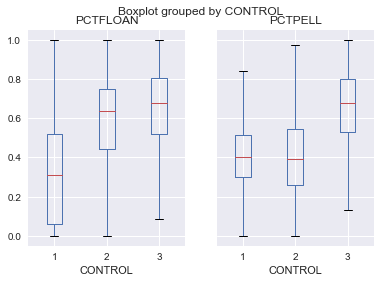

In [210]:
college.boxplot(column=["PCTFLOAN","PCTPELL"], by="CONTROL")

* From the first boxplot, we know that the rate of receiving federal loan is the lowest in the public institutions (`CONTROL`=1), and the rate of receiving federal loan is the highest in the private for-profit institutions (`CONTROL`=3).
* Unlike the first boxplot, the second boxplot shows that the private non-profit institutions, instead of public institutions, have the lowest rate of receiving Pell Grand. The private for-profit institutions has the highest rate of receiving Pell Grand. 

The two boxplots, as shown below, demonstrate the distribution of variable `DEP_INC_AVG` (average family income of dependent students) and variable `IND_INC_AVG` (average family income of independent students) in each type of institution (that is, group by CONTROL).

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022503FEDAC8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000225006DA748>], dtype=object)

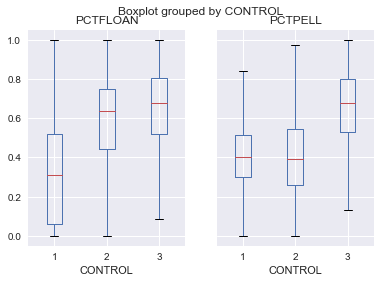

In [211]:
college.boxplot(column=["PCTFLOAN","PCTPELL"], by="CONTROL")

From both boxplots, we know that the average family income for both dependent students and independent students are the highest in the private non-profit institutions (`CONTROL`=2), and lowest in the private for-profit institutions (`CONTROL`=3).

Overall, the average family income for independent students are lower than the average family income for dependent students in each type of institution. 

The four sets of plots, as shown below, display the histogram of the percentage of female students, married students, dependent students and veterans, respectively, grouped by level and the type of institutions. 

### *3.2 Examine the correlation*

We use the `corr()` method to compute pairwise correlation of columns, excluding NA/null values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002250085D240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000225069475C0>]], dtype=object)

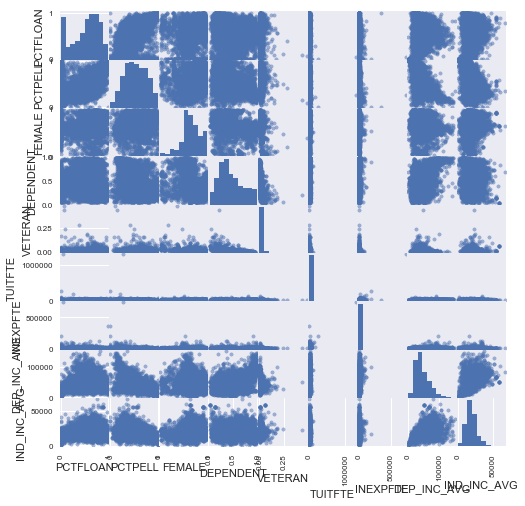

In [212]:
corr_matrix = college.corr()
from pandas.tools.plotting import scatter_matrix
attributes = ["PCTFLOAN","PCTPELL","FEMALE","DEPENDENT","VETERAN","TUITFTE","INEXPFTE","DEP_INC_AVG","IND_INC_AVG"]
scatter_matrix(college[attributes], figsize=(8, 8))

From the scatterplot matrix, as shown above, we obviously can capture two relationships between variables.
* `PCTFLOAN` and `PCTPELL` are positively correlated
* `DEP_INC_AVG` and `IND_INC_AVG` are positively correlated

Let's have a closer look at the relationships between `PCTFLOAN` (the rate of receiving federal loan) and `PCTPELL`(the rate of receiving Pell Grant). Different colors represent different types of institutions (`CONTROL`)

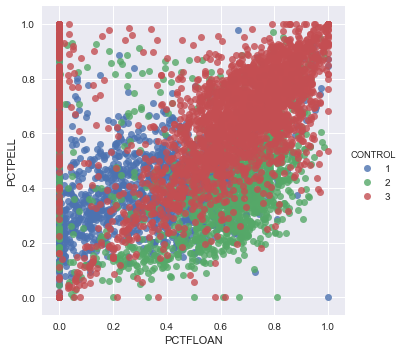

In [213]:
sns.lmplot("PCTFLOAN", "PCTPELL", data=college, fit_reg=False,hue="CONTROL")

The plot shows that, in general, there is a positive relationships between `PCTFLOAN` and `PCTPELL` for each type of institution, which indicates that the higher the rate of receiving federal loan, the higher the rate of receiving Pell Grant as well in the same institution; verse vice. However, some institutions do not offer federal loan no matter how high the rate of receiving Pell Grant in these institutions.  

## 4. Data preparation for Machine Learning algorithms

We now create a new copy of the `train_set` and separate two target variables from independent variables. The DataFrame `college` contains the predictors,  and the DataFrame `college_type` has `CONTROL` and `ICLEVEL`. We confirm their dimensions.

In [214]:
college = train_set.drop(["CONTROL"], axis=1)
college_type = train_set[[ "CONTROL"]].copy()
print(college.shape)
print(college_type.shape)

(6162, 10)
(6162, 1)


### 4.1 Train set data cleaning - imputing missing values

Most Machine Learning algorithms cannot work with missing features, so let's create a few functions to take care of them. We compute the median value on the training set and use it to fill the missing values in the training set.

In [215]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

Then we use the `fit()` method to add `imputer` instance to the dataframe `college` which contains our independent variables. 

The `Imputer` class helps to impute missing values, either using mean, median or the most frequent value of the row or column where missing values are located.

In [216]:
imputer.fit(college)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

Now, replace missing values by the computed medians in order to transform the training set:

In [217]:
X = imputer.transform(college)

Because the result is a Numpy array with transformed features. We can change the result to a Pandas DataFrame.

In [218]:
college_ind = pd.DataFrame(X, columns=college.columns)

In [219]:
college_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6162 entries, 0 to 6161
Data columns (total 10 columns):
PCTFLOAN       6162 non-null float64
PCTPELL        6162 non-null float64
FEMALE         6162 non-null float64
MARRIED        6162 non-null float64
DEPENDENT      6162 non-null float64
VETERAN        6162 non-null float64
TUITFTE        6162 non-null float64
INEXPFTE       6162 non-null float64
DEP_INC_AVG    6162 non-null float64
IND_INC_AVG    6162 non-null float64
dtypes: float64(10)
memory usage: 481.5 KB


The DataFrame has 6162 observations for each variable and no missing values as we have imputed all of them.

For the last step, we need to transform two target variables into 1d array  in order to fit the model.

In [220]:
train_target= college_type[['CONTROL']].values.ravel()

### 4.2 Test set data cleaning - drop rows with missing value

In order to evaluate the final model on the test set, we need to deal with missing values in the test set. Here we choose to drop observations in the test set with missing values

In [221]:
test_set_na = test_set.dropna().copy()

test_ind = test_set_na.drop(["CONTROL"], axis=1)
test_type = test_set_na[[ "CONTROL"]].copy()

And then we need to transform two target variables into 1d array in order to fit the model in the test set.

In [222]:
test_target = test_set_na[['CONTROL']].values.ravel()

This gives us `test_target_control` as the test set for `CONTROL` variable and `test_target_iclevel` as the test set for `ICLEVEL` variable.

## 5. PCA

Principal Component Analysis (PCA) is the most popular way for the dimensionality reduction algorithm. It uses an orthogonal transformation to convert observations of correlated variables into scores of linearly uncorrelated variables. 

For this section, we will provide three kinds of PCA:
* normal PCA
* Incremental PCA
* Randomized PCA

### 5.1 PCA with 2 levels of n_components
Load required libraries and functions that are used for the PCA.

In [223]:
from sklearn.decomposition import PCA
import numpy             as np

#### 5.1.1 PCA with 95% portion of the variance

Firstly we need to choose the number of dimensions that add up to a sufficiently large portion of the variance. We choose 95% as the portion here.

The following code computes PCA without reducing dimensionality, then it computes the minimum number of dimensions required to preserve 95% of the training set's variance.

In [224]:
pca = PCA()
pca.fit(college_ind)
cumsum= np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum>= 0.95)+ 1
print(d)

3


From the above we could find the minimum number of dimensions required is 3. Then we set `n_components =3` and run PCA again.

In [225]:
pca = PCA(n_components = 3)
college_ind_3D = pca.fit_transform(college_ind)
college_ind_3D.shape

(6162, 3)

The above code indicates that we have 3 components instead of 10 independent variables before. 

In order to get prediction accuracy on the test set, we also need to conduct PCA analysis on the test set:

In [226]:
test_ind_3D = pca.fit_transform(test_ind)
test_ind_3D.shape

(591, 3)

After run the PCA analysis successfully, we could use `explained_variance_ratio_` variable to figure out the explained variance ratio of each Principal Component.

In [227]:
print(pca.explained_variance_ratio_)

[ 0.8293569   0.09865777  0.05467886]


This tells us that 82.93% of the dataset's variance lies along the firsst axis, 9.87% lies along the second axis. In addition, only 5.47% lies along the third axis: It is reasonable to assume that it probably carries little information.

And we could display the variance explained by all requested components (taken together):

In [228]:
sum(pca.explained_variance_ratio_)

0.98269353381691815

#### 5.1.2 PCA with 2 components

We are also interested with PCA analysis with fewer components. Since first two components of PCA already explains 90% of the variance, we decide to run another PCA with 2 components in order to compare with 3 components PCA.

In [229]:
pca2 = PCA(n_components = 2)
college_ind_2D = pca2.fit_transform(college_ind)
college_ind_2D.shape

(6162, 2)

The above code indicates that we have 2 components instead of 10 independent variables before. 

In order to get prediction accuracy on the test set, we also need to conduct PCA analysis on the test set:

In [230]:
test_ind_2D = pca2.fit_transform(test_ind)
test_ind_2D.shape

(591, 2)

### 5.2 Incremental PCA with 2 levels of n_components

Unlike the normal PCA, the incremental PCA does not need to load the whole training set for the SVD algorithm to run. It allows us to split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time. It can save memory when the training sets is very large. 

We first load the required libraries for implementing Incremental PCA

In [231]:
from sklearn.decomposition import IncrementalPCA

Then we set the number of batches to 100.

In [232]:
n_batches    = 100

#### 5.2.1 Incremental PCA with 95% portion of the variance

We choose the number of dimensions that explain 95% of the varince in the target variable. 

The following code computes Incremental PCA without reducing dimensionality, then it computes the minimum number of dimensions required to preserve 95% of the training set's variance.

In [233]:
ipca = IncrementalPCA()
for college_batch in np.array_split(college_ind, n_batches):
    ipca.partial_fit(college_batch)
cumsum= np.cumsum(ipca.explained_variance_ratio_)
d= np.argmax(cumsum>= 0.95)+ 1
print(d)

3


The above output tells us that we need to retain 3 principal components to explain 95% of the variance. Keeping 3 principal components, we gain run the Incremental PCA model, with 100 number of batches.

In [234]:
n_batches    = 100
ipca = IncrementalPCA(n_components = 3)

The following code splits the training data `college_ind` into 100 mini-batches using the `array_split()` function and feeds them into Incremental PCA class to reduce the dimensioanlity of the dataset down to 3 dimensions. 

The code also calls the `partial_fit()` method with each mini-batch to fit the model.

In [235]:
for college_batch in np.array_split(college_ind, n_batches):
    ipca.partial_fit(college_batch)

Then we apply the Incremental PCA dimensionality reduction to the training dataset and check the dimensions.

In [236]:
ipca_3D = ipca.transform(college_ind)
ipca_3D.shape

(6162, 3)

The output shows that the dimensions have indeed been reduced to 3. Next we apply the Incremental PCA to the test set.

In [237]:
ipca_test_3D = ipca.transform(test_ind)
ipca_test_3D.shape

(591, 3)

The test set too has been reduced to 3 dimensions.

We now look at the variance explained by each of the three principal components.

In [238]:
print(ipca.explained_variance_ratio_)

[ 0.52042103  0.38499285  0.05514536]


This tells us that 52.04% of the dataset’s variance lies along the first axis, 38.5% lies along the second axis and 5.5% along the 3rd axis.

Now, let's take a look at the total variance explainded by these three components.

In [239]:
sum(ipca.explained_variance_ratio_)

0.96055924233936607

The three components explain a total of 96.06% of the dataset's variance. This suggests that the three componenets may be sufficient to describe the information in the dataset.

#### 5.2.2 Incremental PCA with 2 components

In this section, we explore the Incremental PCA analysis with fewer components. Since first two components of PCA already explains 90% of the variance, we decide to run another PCA with 2 components in order to compare with 3 components PCA.

In [240]:
n_batches    = 100
ipca2 = IncrementalPCA(n_components = 2)

The following code splits the training data `college_ind` into 100 mini-batches using the `array_split()` function and feeds them into Incremental PCA class to reduce the dimensioanlity of the dataset down to 3 dimensions. 

The code also calls the `partial_fit()` method with each mini-batch to fit the model.

In [241]:
for college_batch in np.array_split(college_ind, n_batches):
    ipca2.partial_fit(college_batch)

Then we apply the Incremental PCA dimensionality reduction to the training dataset and check the dimensions.

In [242]:
ipca2_2D = ipca2.transform(college_ind)
ipca2_2D.shape

(6162, 2)

The output shows that the dimensions have indeed been reduced to 2. 

Next we apply the Incremental PCA to the test set.

In [243]:
ipca2_test_2D = ipca2.transform(test_ind)
ipca2_test_2D.shape

(591, 2)

The test set too has been reduced to 2 dimensions.

We now look at the variance explained by each of the two principal components.

In [244]:
print(ipca2.explained_variance_ratio_)

[ 0.5171172   0.37632449]


This tells us that 51.71% of the dataset’s variance lies along the first axis and 37.63% lies along the second axis.

Now, let's take a look at the total variance explainded by these three components.

In [245]:
sum(ipca2.explained_variance_ratio_)

0.8934416927750215

The total variance explained by the two components is close to 90%.

### 5.3 Randomized PCA with 2 levels of n_components

This kind of PCA is faster than the previous two when totoal number of observations is much larger than the first d principal components. The approximate value of d can be quickly found in this way since it apppies the stochastic algorithm.

#### 5.3.1 PCA with 95% portion of the variance

To be consistent with previous sectoins, we choose 95% as `n_components` for Randomized PCA as well. 

The following code computes Randomized PCA without reducing dimensionality, then it computes the minimum number of dimensions required to preserve 95% of the training set's variance.

In [246]:
rpca = PCA(svd_solver="randomized")
rpca.fit(college_ind)
cumsum= np.cumsum(pca.explained_variance_ratio_)
d= np.argmax(cumsum>= 0.95)+ 1
print(d)

3


Since the output, as shown above, gives the minimum number of dimentions as 3, we will use 3 as the value of `n_components` for the Randomized RCA to explain 95% of the training set's variance. 

In [247]:
rpca = PCA(n_components = 3,svd_solver="randomized")

The following code applies the Randomized PCA to the training set. 

In [248]:
rpca_3D = rpca.fit_transform(college_ind)
rpca_3D.shape

(6162, 3)

In [249]:
rpca_3D = rpca.fit_transform(college_ind)
rpca_3D.shape

(6162, 3)

The output shows that the dimensions are reduced from 10 to 3. Next we apply the Randomized PCA to the test set in order to get the prediction accuracy later. 

In [250]:
rpca_test_3D = rpca.transform(test_ind)
rpca_test_3D.shape

(591, 3)

From the output, we know that the dimentions are reduced to 3 in the test set as well.

The `explained_variance_ratio_` displays the explained variance ratio of each Principal Component.

In [251]:
print(rpca.explained_variance_ratio_)

[ 0.52042729  0.38502626  0.05654997]


The output shows that 52.04% of the dataset’s variance lies along the first axis, 38.50% lies along the second axis and 5.65% along the 3rd axis.

Now, let's take a look at the total variance explainded by these three components.

In [252]:
sum(rpca.explained_variance_ratio_)

0.96200351329068412

The three components explain a total of 96.20% of the dataset's variance. This suggests that the three componenets may be sufficient to describe the information in the dataset.

#### 5.3.2 Randomized PCA with 2 components

In this section, we explore the Randomized PCA analysis with fewer components. Since first two components of Randomized PCA already explains 90% of the variance, we decide to run another Randomized PCA with 2 components in order to compare with 3 principle components.

The following code applies the Randomized PCA with `n_components` as 2. 

In [253]:
rpca2 = PCA(n_components = 2,svd_solver="randomized")
rpca_2D = rpca2.fit_transform(college_ind)
rpca_2D.shape

(6162, 2)

The output shows that the dimensions are successfully reduced from 10 to 3. 

Next we apply the Randomized PCA to the test set in order to get the prediction accuracy later.

In [254]:
rpca_test_2D = rpca2.fit_transform(test_ind)
rpca_test_2D.shape

(591, 2)

From the output, we know that the dimentions are reduced to 3 in the test set as well.

The `explained_variance_ratio_` displays the explained variance ratio of each Principal Component.

In [255]:
print(rpca2.explained_variance_ratio_)

[ 0.8293569   0.09865777]


The output shows that 52.04% of the dataset’s variance lies along the first axis and 38.50% lies along the second axis.

Now, let's take a look at the total variance explainded by these three components.

In [256]:
sum(rpca2.explained_variance_ratio_)

0.92801467266667537

The total variance explained by the two components is around 90.55%.

## 6. Logistic regression model with PCA

Load required libraries and functions that are used for the logistic regression.

In [257]:
import sklearn.linear_model    as sk_lm
import sklearn.multiclass      as sk_mc
import sklearn.model_selection as sk_ms
import sklearn.preprocessing   as sk_pp
import sklearn.metrics         as sk_me

from sklearn.linear_model    import SGDClassifier
from sklearn.metrics         import confusion_matrix
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import precision_score
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

### 6.1 Logistic regression with PCA

#### 6.1.1 Training and fitting the model

Inside the pipeline, we create two classifiers by using the LogisticRegression classifier and scale dataset to increase the accuracy.

In [258]:
from sklearn.pipeline import Pipeline
logistic_classifier_3D = Pipeline((
("scaler", StandardScaler()),
("log_clf", LogisticRegression(solver='liblinear',
                             random_state=42))
))

In [259]:
from sklearn.pipeline import Pipeline
logistic_classifier_2D = Pipeline((
("scaler", StandardScaler()),
("log_clf", LogisticRegression(solver='liblinear',
                             random_state=42))
))

Based on 3 & 2 new components we get from PCA, we create two new logistic regresion models:

In [260]:
logistic_classifier_3D.fit(college_ind_3D, train_target)
logistic_classifier_2D.fit(college_ind_2D, train_target)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))))

#### 6.1.2 Accuracy
The following code calculates the accuracy score when applying the model based on the 3 & 2 components of PCA method to the test set for predicting the target categorical variable. 

In [261]:
from sklearn.metrics import accuracy_score

pre_test_3D= logistic_classifier_3D.predict(test_ind_3D)
print ("Accuracy score of 3 components PCA is:", accuracy_score(test_target, pre_test_3D))

Accuracy score of 3 components PCA is: 0.575296108291


In [262]:
pre_test_2D= logistic_classifier_2D.predict(test_ind_2D)
print ("Accuracy score of 2 components PCA is:", accuracy_score(test_target, pre_test_2D))

Accuracy score of 2 components PCA is: 0.651438240271


### 6.2 Logistic regression with Incremental PCA

#### 6.2.1 Training and fitting the model

Based on the two logistic regression classifiers we trained earlier, we fit the two logistic regression models using Incremental PCA with 3 and 2 components respectively.

In [263]:
logistic_classifier_3D.fit(ipca_3D, train_target)
logistic_classifier_2D.fit(ipca2_2D, train_target)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))))

#### 6.1.2 Accuracy

The code below calculates the accuracy score when applying the logistic regression model using the Incremental PCA scores to the test set for predicting the target categorical variable. 

In [264]:
inc_test_3D= logistic_classifier_3D.predict(ipca_test_3D)
print ("Accuracy score of 3 components PCA is:", accuracy_score(test_target, inc_test_3D))

Accuracy score of 3 components PCA is: 0.874788494078


In [265]:
inc_test_2D= logistic_classifier_2D.predict(ipca2_test_2D)
print ("Accuracy score of 2 components PCA is:", accuracy_score(test_target, inc_test_2D))

Accuracy score of 2 components PCA is: 0.612521150592


This clearly shows that the 3 component Incremental PCA performs better than the 2 component PCA. However the accuracy is much better than that obtained by ordinary PCA.

### 6.3 Logistic regression with Randomized PCA

#### 6.3.1 Training and fitting the model

Based on the two logistic regression classifiers we trained earlier, we fit the two logistic regression models using Incremental PCA with 3 and 2 components respectively.

In [266]:
logistic_classifier_3D.fit(rpca_3D, train_target)
logistic_classifier_2D.fit(rpca_2D, train_target)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))))

#### 6.3.2 Accuracy

The code below calculates the accuracy score when applying the logistic regression model using the Randomized PCA scores to the test set for predicting the target categorical variable. 

In [267]:
from sklearn.metrics import accuracy_score

predict_test_3D= logistic_classifier_3D.predict(rpca_test_3D)
print ("Accuracy score of 95% component Randomized PCA is:", accuracy_score(test_target, predict_test_3D))

Accuracy score of 95% component Randomized PCA is: 0.869712351946


From the output, we know that the accuarcy score for 3 principle component is around 86.97%.

In [268]:
predict_test_2D= logistic_classifier_2D.predict(rpca_test_2D)
print ("Accuracy score of 2 component Randomized PCA is:", accuracy_score(test_target, predict_test_2D))

Accuracy score of 2 component Randomized PCA is: 0.651438240271


## **7. Logistic regression model with Kernel PCA**


Kernel PCA performs the non-linear projections for dimensionality reduction, which is the extension of Principal Component Analysis.  In Kernel PCA, through the use of kernels, principle components can be computed efficiently
in high-dimensional feature spaces that are related to the input space by some nonlinear mapping.

Kernel PCA finds principal components which are nonlinearly related to the input space by performing PCA in the space produced by the nonlinear mapping.

### 7.1 GridSearch with KernelPCA

The first step is to load required libraries and functions that are used for GridSearch with KernelPCA except the libraries that have been loaded before.

In [269]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV

Based on the previous analysis, we mainly focus on different PCA method with 2 components and 3 components. Therefore, we will conduct Kernel PCA with 3 components and 2 components respectively.

### 7.1.1  KernelPCA with  3 components

The following code is to create the pipeline that is used to apply the Kernel PCA to the logistic regression. 

In [270]:
clf = Pipeline([
        ("kpca", KernelPCA(n_components=3)),
        ("log_reg", LogisticRegression())
    ])

We can use the grid search to select the best kernel and hyperparameter values that can lead to the highest performance. There are two hyperparameters in the model: `kpca__gamma` and `kpca__kernel` and options of each hyperparameters are displayed in the following code:

In [271]:
gamma_range = 10. ** np.arange(-2, 2)
param_grid = [{
        "kpca__gamma": gamma_range,
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

The following code applies the grid search to the model with 3-fold cross validation

In [272]:
grid_search = GridSearchCV(clf, param_grid, cv=3)

PCa assumes that the dataset is centered arout 

In [273]:
college_ind_centered= college_ind-college_ind.mean(axis=0)

In [274]:
grid_search.fit(college_ind_centered, train_target)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=3, n_jobs=1,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', LogisticRegre...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'kpca__gamma': array([  0.01,   0.1 ,   1.  ,  10.  ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

The best kernel and hyperparameters are given by using the following code:

In [275]:
grid_search.best_params_

{'kpca__gamma': 0.01, 'kpca__kernel': 'sigmoid'}

The best kernel is `sigmoid` and best gamma value is 0.01.

### 7.1.2  KernelPCA with  2 components

We could follow the same process of Kernel PCA with 3 components to get the result of Kernel with 2 components. 

In [276]:
clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression())
    ])

gamma_range = 10. ** np.arange(-2, 2)
param_grid = [{
        "kpca__gamma": gamma_range,
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)

college_ind_centered= college_ind-college_ind.mean(axis=0)

grid_search.fit(college_ind_centered, train_target)

grid_search.best_params_

{'kpca__gamma': 0.01, 'kpca__kernel': 'sigmoid'}

From the above output, we could find that the best kernel and hyperparameters are exactly the same with Kernel PCA with 3 components.

### 7.2 Logistic regression model with KernelPCA 

After the grid search for the best kernel and hyperparameters, we using the following code to perform logistic regression with kernel PCA of 3 components and 2 components respectively.

### 7.2.1   Logistic regression with KernelPCA - 3 components

In [277]:
sig_pca = KernelPCA(n_components = 3, kernel="sigmoid", gamma=0.01)
college_ind_3D = sig_pca.fit_transform(college_ind)
college_ind_3D.shape

(6162, 3)

In order to get prediction accuracy on the test set, we also need to conduct PCA analysis on the test set:

In [278]:
test_ind_3D = sig_pca.fit_transform(test_ind)
test_ind_3D.shape

(591, 3)

Inside the pipeline, we create two classifiers by using the LogisticRegression classifier and scale dataset to increase the accuracy.

In [279]:
logistic_classifier_3D = Pipeline((
("scaler", StandardScaler()),
("log_clf", LogisticRegression(solver='liblinear',
                             random_state=42))
))

Based on 3 new components we get from PCA, we create the logistic regresion model:

In [280]:
logistic_classifier_3D.fit(college_ind_3D, train_target)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))))

The following code calculates the accuracy score when applying the model based on the 3 & 2 components of PCA method to the test set for predicting the target categorical variable.

In [281]:
pre_test_3D= logistic_classifier_3D.predict(test_ind_3D)
print ("Accuracy score of 3 components PCA is:", accuracy_score(test_target, pre_test_3D))

Accuracy score of 3 components PCA is: 0.507614213198


### 7.2.2  Logistic regression with KernelPCA - 2 components

As the same, we could get logistic regression model with Kernel PCA (2 components) as well as the accuracy score.

In [282]:
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.01)
college_ind_2D = sig_pca.fit_transform(college_ind)
college_ind_2D.shape

(6162, 2)

In [283]:
test_ind_2D = sig_pca.fit_transform(test_ind)
test_ind_2D.shape

(591, 2)

In [284]:
logistic_classifier_2D = Pipeline((
("scaler", StandardScaler()),
("log_clf", LogisticRegression(solver='liblinear',
                             random_state=42))
))

In [285]:
logistic_classifier_2D.fit(college_ind_2D, train_target)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))))

In [286]:
pre_test_2D= logistic_classifier_2D.predict(test_ind_2D)
print ("Accuracy score of 2 components PCA is:", accuracy_score(test_target, pre_test_2D))

Accuracy score of 2 components PCA is: 0.507614213198


Regardless of whether we keep 2 or 3 components, the accuracy score of logistic regression model with Kernel PCA stays the same at 0.51.

## **8. Comparison of model performance**

From Assignment 2, we obtained the accuracy score for logistic regression model as 0.89. 

The following table summarizes the prediction accuracy for each logistic regression model with different PCA and different levels of `n_components`. In addition, we also list the logistic regression model without PCA for comparison.

| **PCA** | **`n_component`=0.95**| **`n_component`=2**  
| ------------- |:-------------:| -----------:
|Not performed| 0.89|0.89   | 
|Normal PCA| 0.58|0.65   | 
|Incremental PCA| 0.88 | 0.61|
|Randomized PCA| 0.87 | 0.65| 
|Kernel PCA| 0.51| 0.51| 

From the summary table, we can observe the following:

1. Logistic regression model performs better without dimensionality reduction.
2. Among the different PCA methods used, Incremental PCA performs best for 3 components and Randomized PCA performs best for 2 components
3. Kernel PCA does a poor job predicting the classes
4. Keeping the number of components as 3 increases the prediction accuracy as compared to using only 2 components

## **9. Conclusion**


The subset of the dataset that we were using for our analysis contained only 10 independent variables, some of which were mildly correlated. In such a case, there may not be a need to perform any dimensionality reduction. Since there is little correlation among the variables, all of the varibles are bringing in new information and throwing away any of them would lead to data leakage. We believe this is the reason our model did not perform well with PCA.